<a href="https://colab.research.google.com/github/MDfarazuddin99/BTC_Price_Prediction_and_Data_Mining/blob/main/BTC_EDA_RF_GB_KNN_SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 576 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

# data preperation

In [4]:
# data = pd.read_csv('../input/cryptocurrencies-dataset/crypto_data_updated_13_november.csv')

In [5]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [6]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [7]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-29 00:00:00+00:00,9888.610352,11568799744,427.523010,2675940096,0.990606,1672120064,1.75153,43765500
2017-11-30 00:00:00+00:00,10233.599609,8310689792,447.114014,1903040000,1.008100,1043969984,1.99697,31559500
2017-12-01 00:00:00+00:00,10975.599609,6783119872,466.540009,1247879936,1.009780,749395968,2.07023,28867200
2017-12-02 00:00:00+00:00,11074.599609,5138500096,463.449005,943649984,0.999654,679950016,2.08416,24332700
2017-12-03 00:00:00+00:00,11323.200195,6608309760,465.852997,990556992,1.000660,946748992,2.22725,35163500


In [8]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2022-11-24 00:00:00+00:00,16604.464844,26129037414,1203.983154,9706372376,0.999421,36841695607,300.427826,1219177799
2022-11-25 00:00:00+00:00,16521.841797,18678255976,1198.925903,5483308196,0.999578,25728613650,300.577698,949045515
2022-11-26 00:00:00+00:00,16464.281250,18000008764,1205.897949,5074160558,0.999574,25190862393,311.388458,1221554861
2022-11-27 00:00:00+00:00,16444.626953,20443898509,1195.126953,4486976868,0.999604,27588594951,307.429291,793779029
2022-11-29 00:00:00+00:00,16169.668945,27634855936,1164.456543,7200288768,0.999694,37112893440,290.398041,1151626496


In [12]:
# data = data.drop(columns = ['Unnamed: 0'])

In [13]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-29 00:00:00+00:00,9888.610352,11568799744,427.523010,2675940096,0.990606,1672120064,1.75153,43765500
2017-11-30 00:00:00+00:00,10233.599609,8310689792,447.114014,1903040000,1.008100,1043969984,1.99697,31559500
2017-12-01 00:00:00+00:00,10975.599609,6783119872,466.540009,1247879936,1.009780,749395968,2.07023,28867200
2017-12-02 00:00:00+00:00,11074.599609,5138500096,463.449005,943649984,0.999654,679950016,2.08416,24332700
2017-12-03 00:00:00+00:00,11323.200195,6608309760,465.852997,990556992,1.000660,946748992,2.22725,35163500


In [14]:
data.to_csv('crypto prices.csv')

In [15]:
data.shape

(1826, 8)

In [16]:
original = data.iloc[-1, :]
data = data.iloc[:-1,:]

In [17]:
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2017-11-29 00:00:00+00:00,9888.610352,11568799744,427.523010,2675940096,0.990606,1672120064,1.751530,43765500
2017-11-30 00:00:00+00:00,10233.599609,8310689792,447.114014,1903040000,1.008100,1043969984,1.996970,31559500
2017-12-01 00:00:00+00:00,10975.599609,6783119872,466.540009,1247879936,1.009780,749395968,2.070230,28867200
2017-12-02 00:00:00+00:00,11074.599609,5138500096,463.449005,943649984,0.999654,679950016,2.084160,24332700
2017-12-03 00:00:00+00:00,11323.200195,6608309760,465.852997,990556992,1.000660,946748992,2.227250,35163500
...,...,...,...,...,...,...,...,...
2022-11-23 00:00:00+00:00,16610.707031,32958875628,1183.199585,11242676044,0.999194,45720458651,297.847443,1920236928
2022-11-24 00:00:00+00:00,16604.464844,26129037414,1203.983154,9706372376,0.999421,36841695607,300.427826,1219177799
2022-11-25 00:00:00+00:00,16521.841797,18678255976,1198.925903,5483308196,0.999578,25728613650,300.577698,949045515


# Exploratory Data Analysis

### Statistical Analysis

In [18]:
#check the shape of the dataframe
data.shape 

(1825, 8)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2017-11-29 00:00:00+00:00 to 2022-11-27 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1825 non-null   float64
 1   Volume (BTC)   1825 non-null   int64  
 2   Close (ETH)    1825 non-null   float64
 3   Volume (ETH)   1825 non-null   int64  
 4   Close (USDT)   1825 non-null   float64
 5   Volume (USDT)  1825 non-null   int64  
 6   Close (BNB)    1825 non-null   float64
 7   Volume (BNB)   1825 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.3 KB


In [20]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [21]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1825.000000,1.825000e+03,1825.000000,1.825000e+03,1825.000000,1.825000e+03,1825.000000,1.825000e+03
mean,20305.416268,2.651016e+10,1136.204435,1.316733e+10,1.001581,4.190295e+10,146.188957,9.806094e+08
std,17003.073346,1.987695e+10,1202.651674,1.082453e+10,0.005766,3.827200e+10,184.173296,1.451305e+09
min,3236.761719,2.923670e+09,84.308296,9.436500e+08,0.966644,6.685100e+08,1.751530,9.284000e+03
25%,7680.066406,1.220050e+10,208.863434,4.709988e+09,0.999975,7.911756e+09,14.312100,1.430499e+08
50%,10944.585938,2.424142e+10,492.734985,1.104951e+10,1.000491,3.712660e+10,25.218315,3.610598e+08
75%,33746.003906,3.580788e+10,1803.913330,1.836401e+10,1.002490,6.104333e+10,296.298462,1.431595e+09
max,67566.828125,3.509679e+11,4812.087402,8.448291e+10,1.077880,2.790675e+11,675.684082,1.798295e+10


### Visualization Analysis

In [25]:
import plotly.express as px

px.line(data)

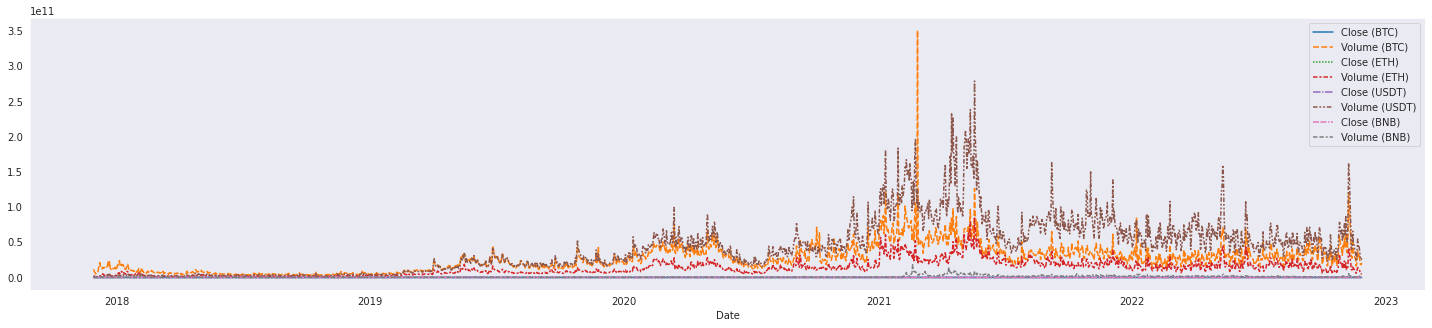

In [22]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

Text(0.5, 1.0, 'Adjacent Close Price')

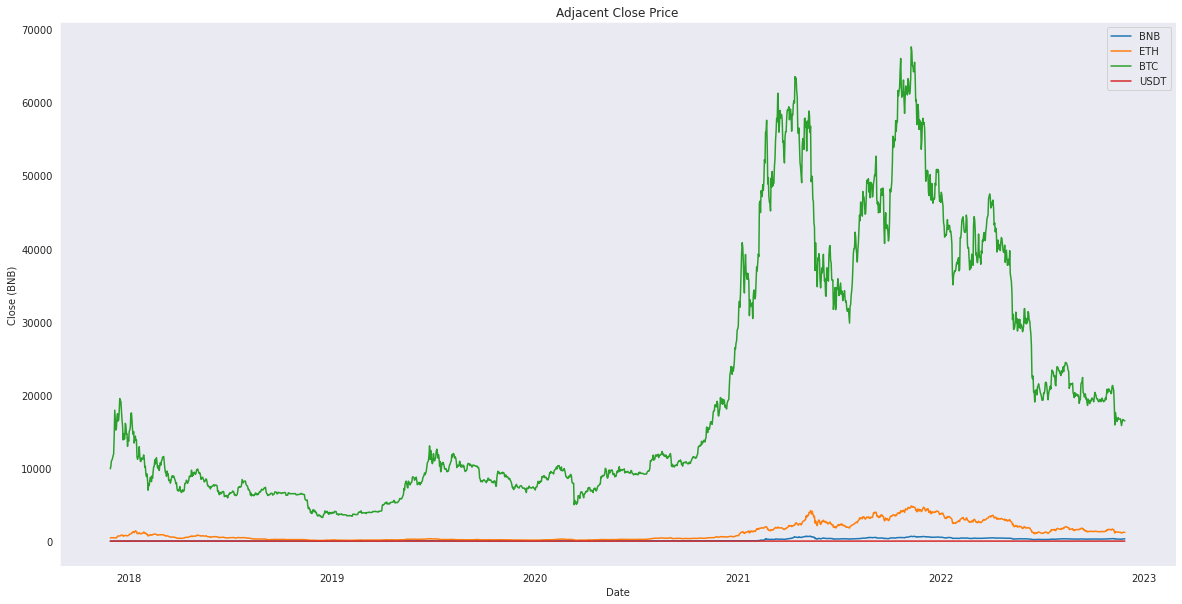

In [26]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Close (BNB)'], label = 'BNB')
sns.lineplot(data = data['Close (ETH)'], label = 'ETH')
sns.lineplot(data = data['Close (BTC)'], label = 'BTC')
sns.lineplot(data = data['Close (USDT)'], label = 'USDT')
plt.title('Adjacent Close Price')

Text(0.5, 1.0, 'Volume')

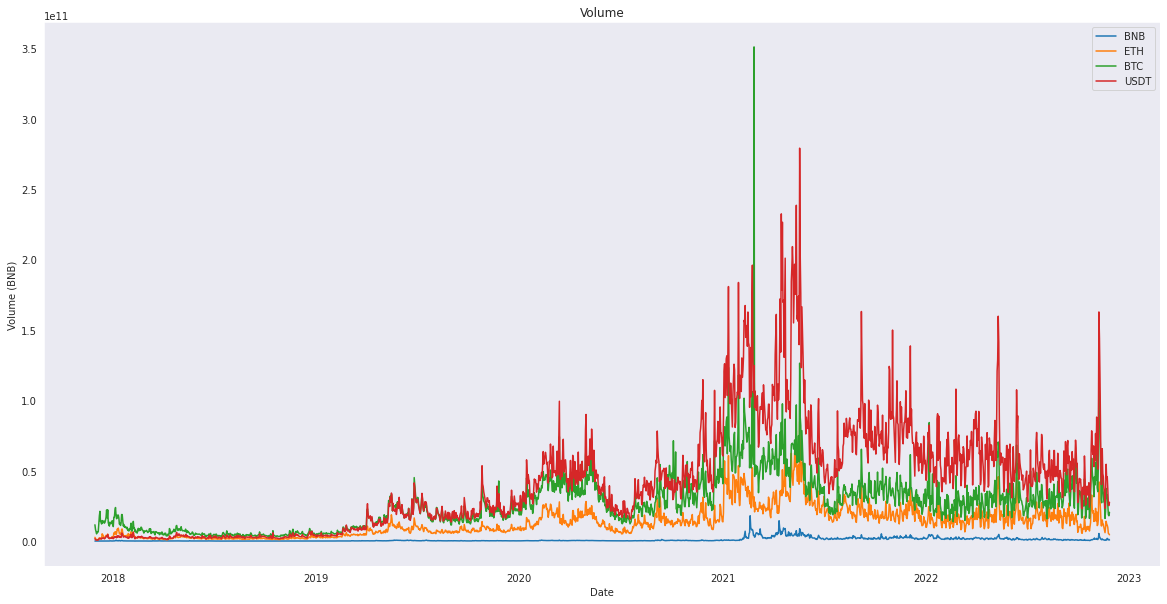

In [27]:
plt.figure(figsize = (20, 10))
sns.set_style('dark')
sns.lineplot(data = data['Volume (BNB)'], label = 'BNB')
sns.lineplot(data = data['Volume (ETH)'], label = 'ETH')
sns.lineplot(data = data['Volume (BTC)'], label = 'BTC')
sns.lineplot(data = data['Volume (USDT)'], label = 'USDT')
plt.title('Volume')

In [28]:
data.loc[:,'Close (BTC)'].values

array([ 9888.61035156, 10233.59960938, 10975.59960938, ...,
       16521.84179688, 16464.28125   , 16444.62695312])

In [29]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=data.index,
                close=data.loc[:,'Close (BTC)'].values)])

fig.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb81554990>,
      dtype=object)

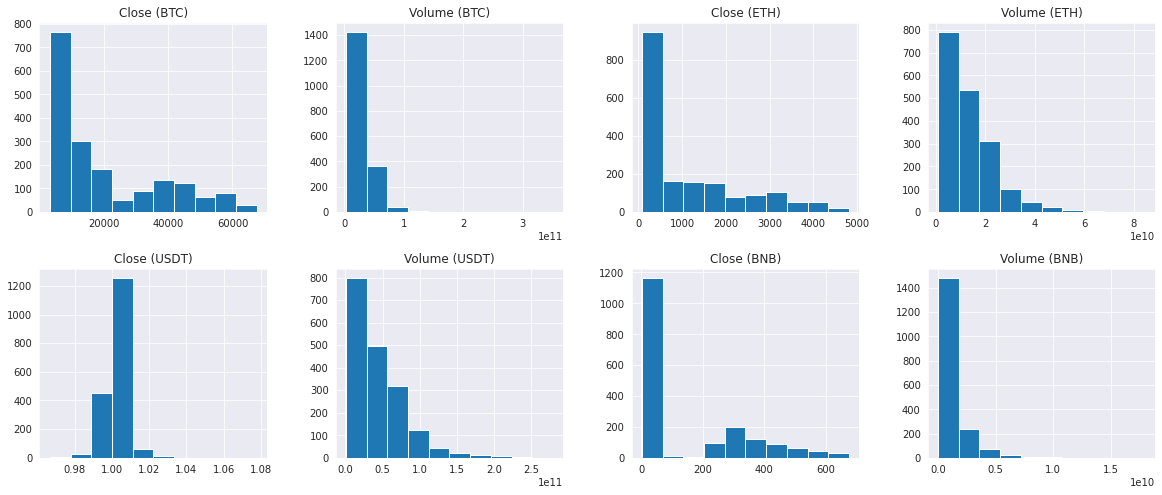

In [30]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb8127dd90>,
      dtype=object)

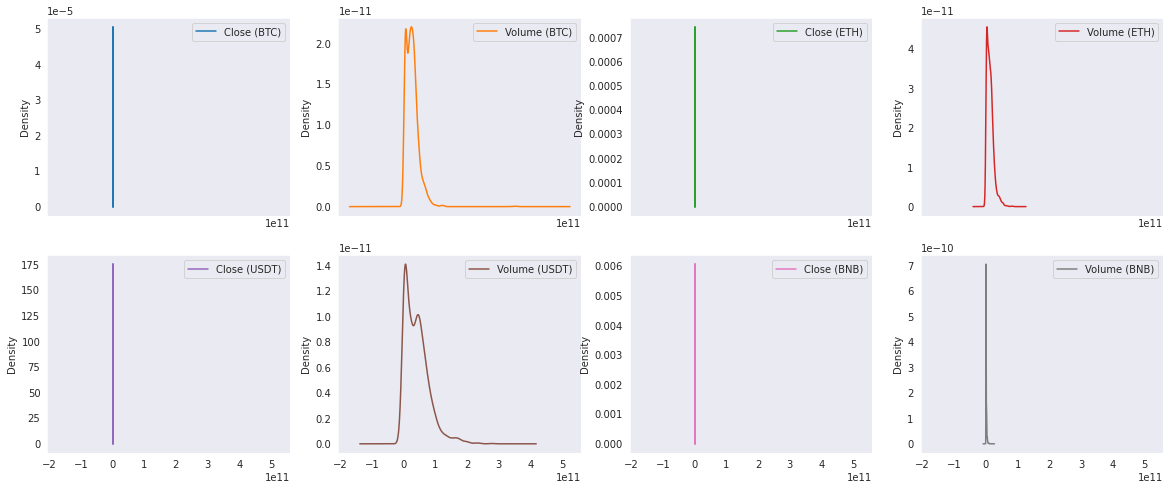

In [31]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

### checking for correlation

In [32]:
data.corr()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Close (BTC),1.000000,0.553847,0.923755,0.661884,-0.148074,0.762919,0.897357,0.762493
Volume (BTC),0.553847,1.000000,0.376294,0.854919,-0.099467,0.866612,0.406927,0.596443
Close (ETH),0.923755,0.376294,1.000000,0.539667,-0.151981,0.623271,0.953792,0.648584
Volume (ETH),0.661884,0.854919,0.539667,1.000000,-0.118546,0.946043,0.558563,0.696141
Close (USDT),-0.148074,-0.099467,-0.151981,-0.118546,1.000000,-0.140251,-0.164289,-0.115999
Volume (USDT),0.762919,0.866612,0.623271,0.946043,-0.140251,1.000000,0.648967,0.772214
Close (BNB),0.897357,0.406927,0.953792,0.558563,-0.164289,0.648967,1.000000,0.715940
Volume (BNB),0.762493,0.596443,0.648584,0.696141,-0.115999,0.772214,0.715940,1.000000


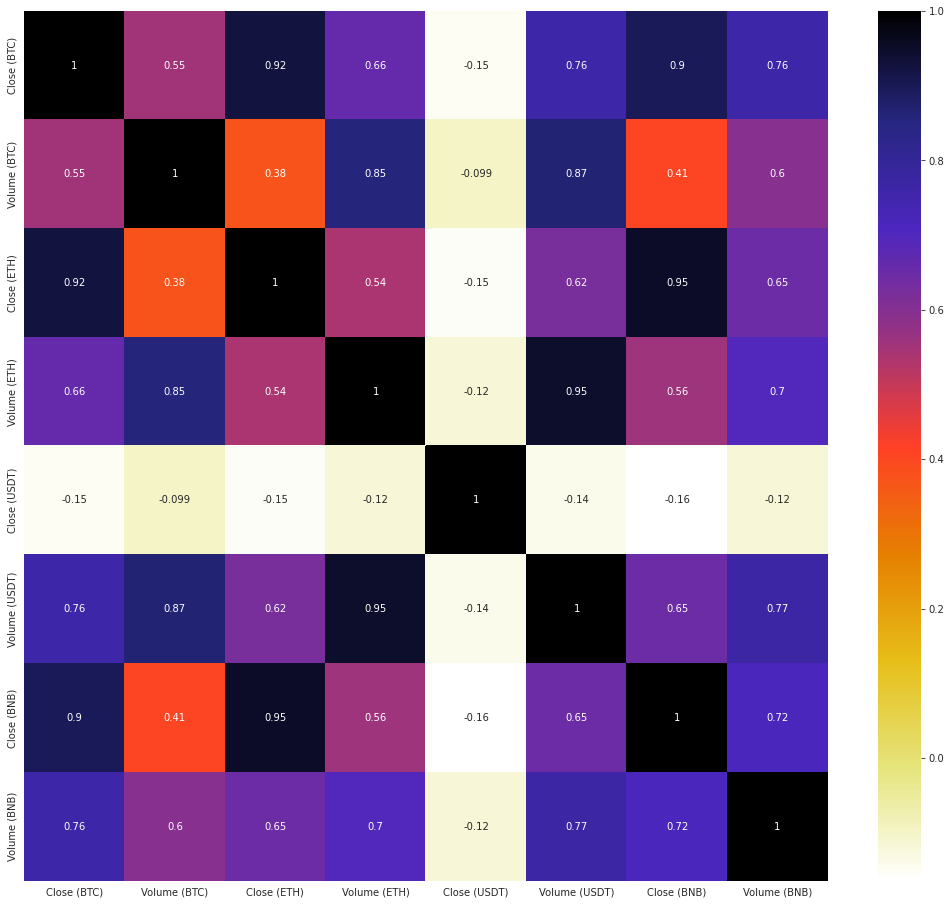

In [33]:
plt.figure(figsize=(18,16))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r);

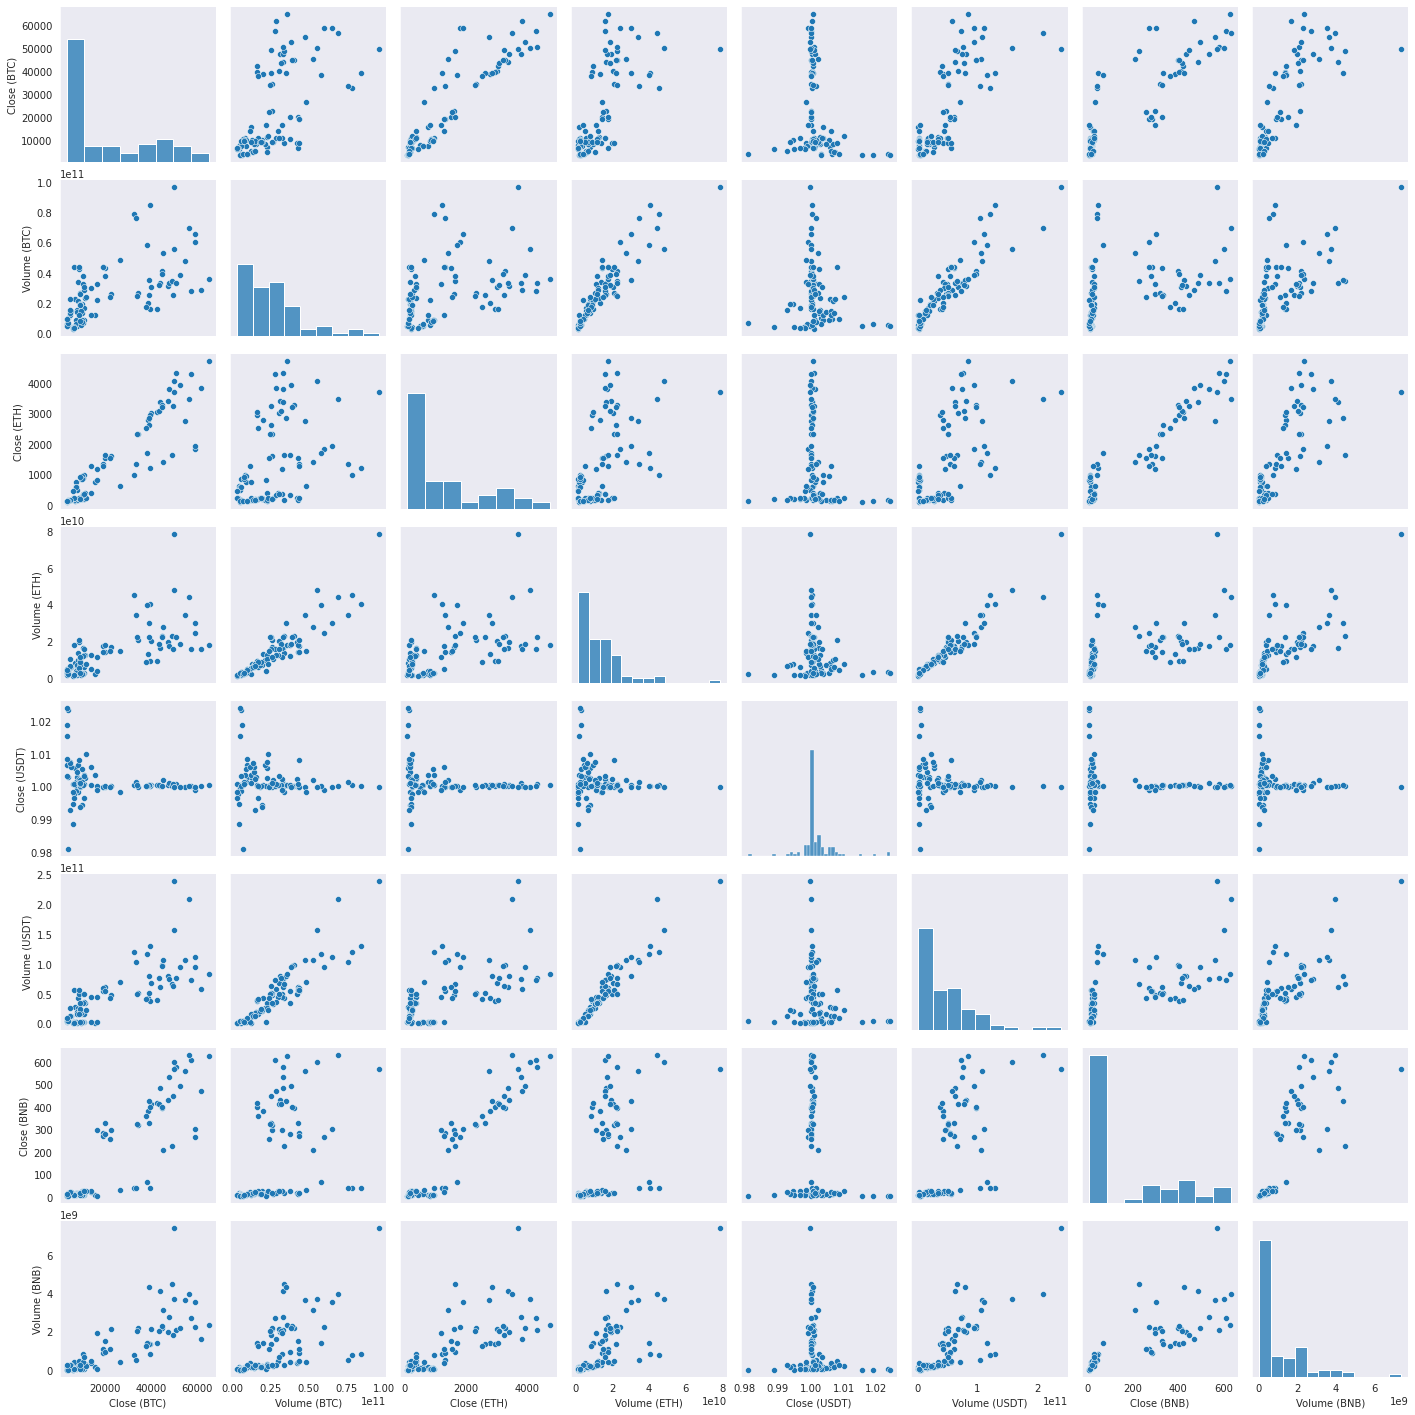

In [34]:
sns.pairplot(data.sample(n=100));

In [42]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

TypeError: ignored

# data Pre-processing

In [43]:
# X = data.loc[:, ['Adj Close (BNB)', 'Adj Close (USDT)', 'Adj Close (ETH)']]
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [44]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2017-11-29 00:00:00+00:00,11568799744,427.523010,2675940096,0.990606,1672120064,1.75153,43765500
2017-11-30 00:00:00+00:00,8310689792,447.114014,1903040000,1.008100,1043969984,1.99697,31559500
2017-12-01 00:00:00+00:00,6783119872,466.540009,1247879936,1.009780,749395968,2.07023,28867200
2017-12-02 00:00:00+00:00,5138500096,463.449005,943649984,0.999654,679950016,2.08416,24332700
2017-12-03 00:00:00+00:00,6608309760,465.852997,990556992,1.000660,946748992,2.22725,35163500


In [45]:
Y.head()

Date
2017-11-29 00:00:00+00:00     9888.610352
2017-11-30 00:00:00+00:00    10233.599609
2017-12-01 00:00:00+00:00    10975.599609
2017-12-02 00:00:00+00:00    11074.599609
2017-12-03 00:00:00+00:00    11323.200195
Name: Close (BTC), dtype: float64

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

In [47]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Selection

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# BaseLine Modeling




In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [51]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=2)

In [52]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [53]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [54]:
est = GradientBoostingRegressor()
est.fit(X_train, Y_train)

GradientBoostingRegressor()

# Evaluation

In [55]:
Y_pred_neigh = neigh.predict(X_test)
r2neigh = metrics.r2_score(Y_test, Y_pred_neigh)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

Y_pred_dt = dt.predict(X_test)
r2dt = metrics.r2_score(Y_test, Y_pred_dt)

Y_pred_est = est.predict(X_test)
r2est = metrics.r2_score(Y_test, Y_pred_est)

In [56]:
print("*"*10, "Accuracy", "*"*10)

print("-"*30)
print("K nearest neighbors: ", r2neigh)
print("-"*30)


print("-"*30)
print("random forest: ", r2rf)
print("-"*30)


print("-"*30)
print("decision tree: ", r2dt)
print("-"*30)


print("-"*30)
print("gradient boosting: ", r2est)
print("-"*30)

********** Accuracy **********
------------------------------
K nearest neighbors:  0.9658718210398993
------------------------------
------------------------------
random forest:  0.9658263930675474
------------------------------
------------------------------
decision tree:  0.9377584617182393
------------------------------
------------------------------
gradient boosting:  0.9552777345332376
------------------------------


result: random forest gives the highest accuracy.

In [57]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
sns.lineplot(x = X_test.index, y = Y_pred, label = "Predicted Price")
sns.lineplot(x = X_test.index, y = Y_test, label = "Actual Price")
plt.title('Actual vs Predicted values in test data')

AttributeError: ignored

<Figure size 2000x1000 with 0 Axes>

In [58]:
plt.figure(figsize = (20, 10))
sns.set_style('darkgrid')
sns.lineplot(x = X_train.index, y = rf.predict(X_train), label = "Predicted Price")
sns.lineplot(x = X_train.index, y = Y_train, label = "Actual Price")
plt.title('Actual vs Predicted values in training data')

AttributeError: ignored

<Figure size 2000x1000 with 0 Axes>

# Hyperparameter Tuning

In [59]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [60]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 1

In [61]:
rf_random.best_params_

{'n_estimators': 260,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

# Model Evaluation (performance analysis)

In [62]:
rf = RandomForestRegressor(**rf_random.best_params_)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
r2rf = metrics.r2_score(Y_test, Y_pred_rf)

print("-"*30)
print("Accuracy: ", r2rf)
print("-"*30)

------------------------------
Accuracy:  0.9682968644957287
------------------------------


# Machine Learning Explainability

In [64]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 14.8 MB/s 


In [65]:
import shap

In [66]:
shap.initjs()

In [67]:
shap_values = shap.TreeExplainer(rf).shap_values(X_test)

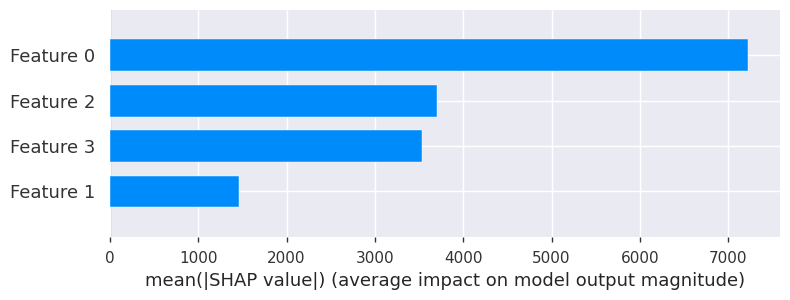

In [68]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

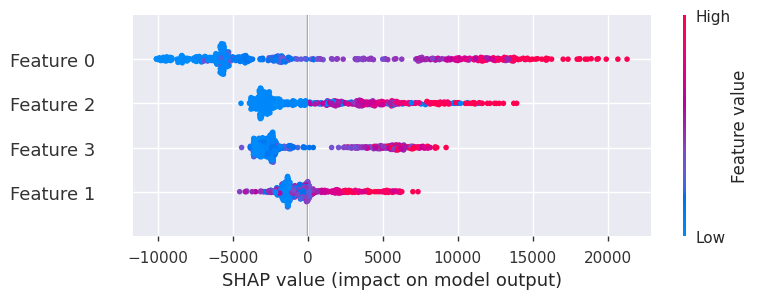

In [69]:
shap.summary_plot(shap_values, X_test)

[0.07656252 0.0042692  0.01474669 0.00516723]


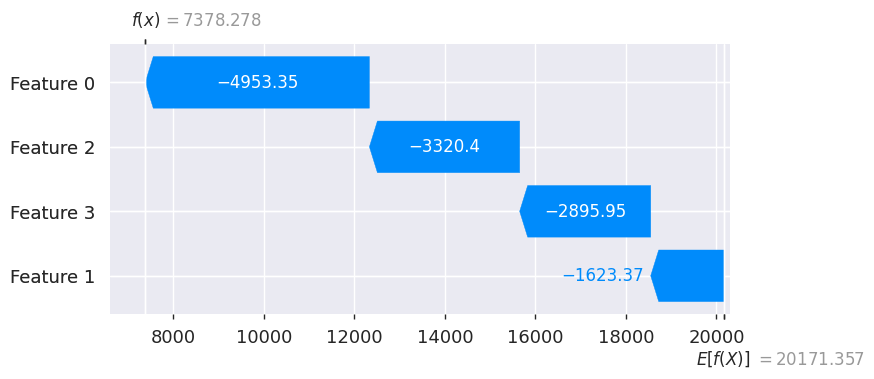

In [70]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf).expected_value[0], 
                                       shap_values[row],
                                      )

print(X_test[111])

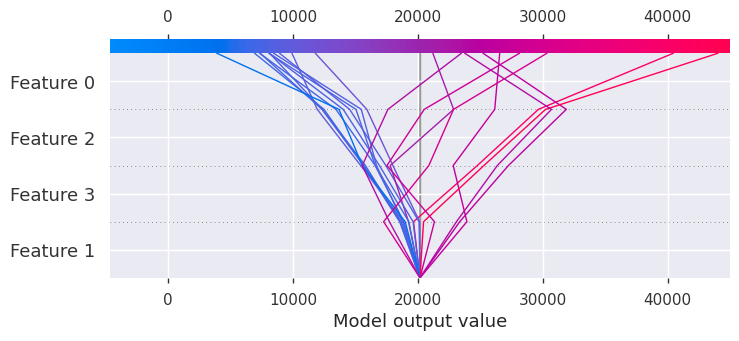

In [71]:
shap.decision_plot(shap.TreeExplainer(rf).expected_value[0], 
                   shap_values[110:130])

In [74]:
shap.initjs()
shap.force_plot(shap.TreeExplainer(rf).expected_value, shap_values[0:257], X_test[0:257])

# Prediction

In [75]:
original

Close (BTC)      1.616967e+04
Volume (BTC)     2.763486e+10
Close (ETH)      1.164457e+03
Volume (ETH)     7.200289e+09
Close (USDT)     9.996938e-01
Volume (USDT)    3.711289e+10
Close (BNB)      2.903980e+02
Volume (BNB)     1.151626e+09
Name: 2022-11-29 00:00:00+00:00, dtype: float64

---